<a href="https://colab.research.google.com/github/abharathkumarr/CS276/blob/main/Activity4_CommunityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#community detection algorithms
import networkx.algorithms.community as nx_comm

In [2]:
#load the Zachary's Karate Club
karate = nx.karate_club_graph()

See Girvan-Newman in NetworkX

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html

In [3]:
communities_gn = nx_comm.girvan_newman(karate)
#Returns:Iterator over tuples of sets of nodes in G.
#Each set of node is a community, each tuple is a sequence of communities at
#a particular level of the algorithm.

#tuple(sorted(c) for c in next(communities_gn))
node_groups = []
for com in next(communities_gn):
    node_groups.append(list(com))

#or use following
#node_groups = next(result)

len(node_groups)

print("# of communities: ", len(node_groups), ", modularity score: ", nx_comm.modularity(karate, node_groups))


# of communities:  2 , modularity score:  0.3476602762317048


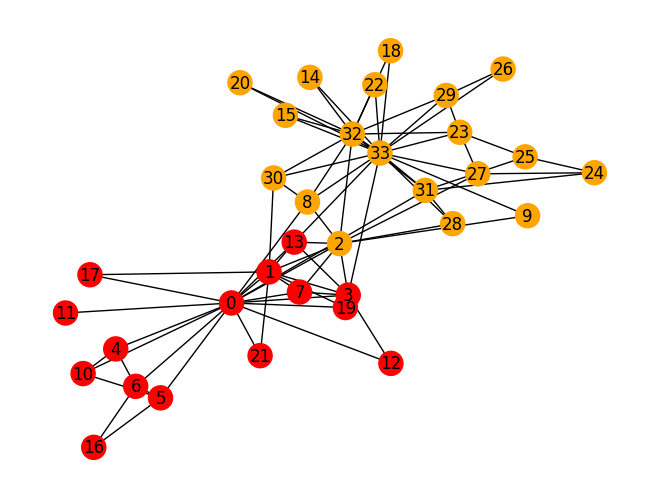

In [4]:
#draw communities of Girvan Newman algorithm
color_map = []
for node in karate:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")
nx.draw(karate, node_color=color_map, with_labels=True)
plt.show()

Help methods to set same color to nodes and edges in each community.

In [5]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [6]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

To get only the first k tuples of communities


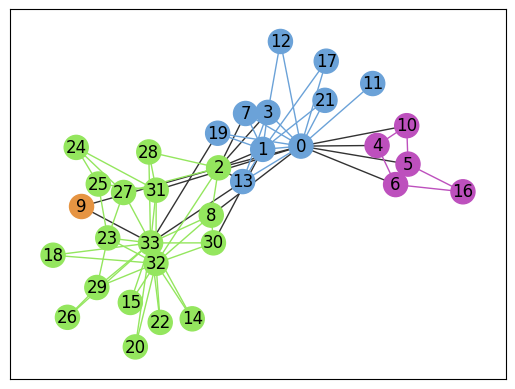

In [7]:
import itertools
result = nx_comm.girvan_newman(karate)
communities = next(itertools.islice(result, 2, 3))
# or use bigger than 4 communities
#k = 2
#limited = itertools.takewhile(lambda c: len(c) <= k, result)

# Set node and edge communities
set_node_community(karate, communities)
set_edge_community(karate)
# Set community color for nodes
node_color = [get_color(karate.nodes[v]['community']) for v in karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] > 0]
internal_color = [get_color(karate.edges[e]['community']) for e in internal]

# Draw external edges
karate_pos = nx.spring_layout(karate)

nx.draw_networkx(
    karate, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    karate, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)

Louvain Algorithm

In [8]:
#Louvain Algorithm
partition=nx_comm.louvain_communities(karate, seed=123)
#returns communities
print("# of communities: ", len(partition), ", modularity score: ", nx_comm.modularity(karate, partition))

# open file in write mode
with open(r'communities.txt', 'w') as fp:
    for item in partition:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')


# of communities:  4 , modularity score:  0.4276718952043627
Done


In [9]:
# Set node and edge communities
set_node_community(karate, partition)
set_edge_community(karate)

# Set community color for nodes
node_color = [get_color(karate.nodes[v]['community']) for v in karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in karate.edges if karate.edges[v, w]['community'] > 0]
internal_color = [get_color(karate.edges[e]['community']) for e in internal]

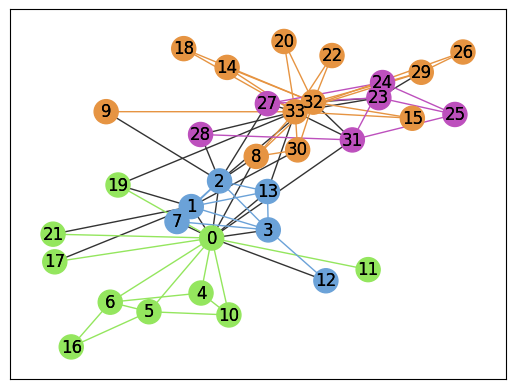

In [10]:
#draw Louvain's communities
karate_pos = nx.spring_layout(karate)
# Draw external edges
nx.draw_networkx(
    karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In [ ]:
TODO
#find a small dataset (~hundreds of nodes)
#find communities with Louvain and Girvan Newman
#print stats
#draw using get_Color

###Dataset

Dolphin social network -
https://networkrepository.com/soc-dolphins.php

In [12]:
from google.colab import files
uploaded = files.upload()


Saving soc-dolphins.mtx to soc-dolphins.mtx


In [15]:
from scipy.io import mmread
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load dolphin graph from .mtx file
matrix = mmread('soc-dolphins.mtx')
G = nx.from_scipy_sparse_array(matrix)

# Print basic info manually
print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


Graph has 62 nodes and 159 edges


##Detect Communities Using Girvan-Newman Algorithm

In [16]:
import networkx.algorithms.community as nx_comm

# Step 2: Run Girvan-Newman algorithm and extract first level communities
from itertools import islice

gn_generator = nx_comm.girvan_newman(G)
communities_gn = next(gn_generator)  # First split → 2 communities
communities_gn = [list(c) for c in communities_gn]

print("Number of communities found:", len(communities_gn))
print("Modularity score:", nx_comm.modularity(G, communities_gn))


Number of communities found: 2
Modularity score: 0.3787033740753925


In [17]:
# Helper to assign a color to each community
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

# Set node community as attribute
def set_node_community(G, communities):
    for c, nodes in enumerate(communities):
        for node in nodes:
            G.nodes[node]['community'] = c + 1

In [18]:
# Set edge community (internal = same color, external = gray)
def set_edge_community(G):
    for u, v in G.edges:
        if G.nodes[u]['community'] == G.nodes[v]['community']:
            G.edges[u, v]['community'] = G.nodes[u]['community']
        else:
            G.edges[u, v]['community'] = 0

# Apply settings
set_node_community(G, communities_gn)
set_edge_community(G)

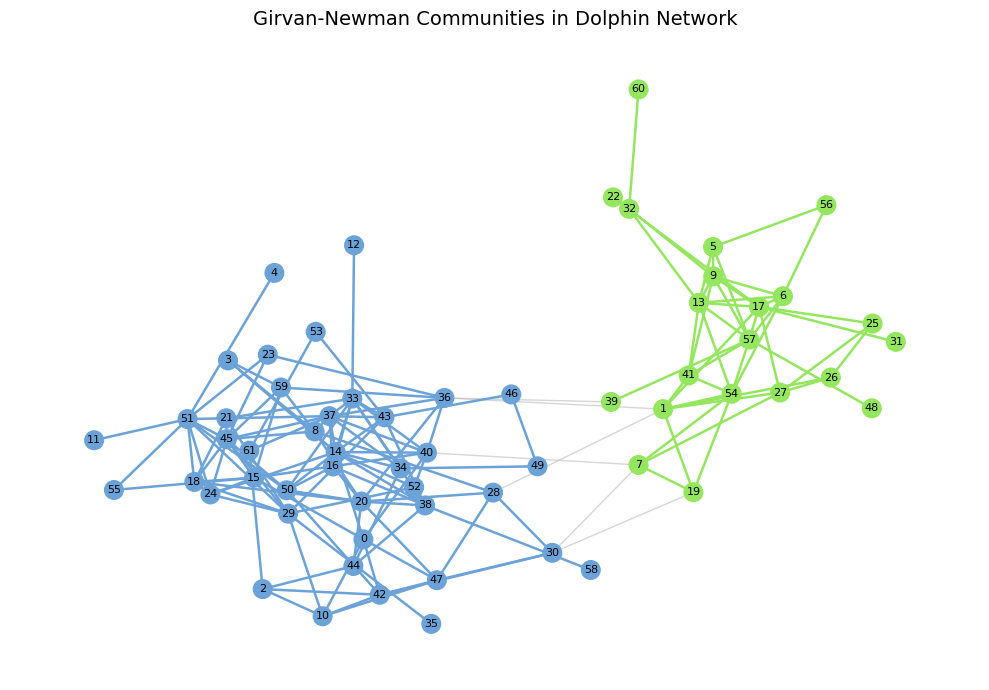

In [20]:
# Prepare colors
node_color = [get_color(G.nodes[n]['community']) for n in G.nodes]
external = [(u, v) for u, v in G.edges if G.edges[u, v]['community'] == 0]
internal = [(u, v) for u, v in G.edges if G.edges[u, v]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

# Updated layout and drawing for better spacing
pos = nx.spring_layout(G, k=0.4, seed=42)  # Increase spacing with higher k

plt.figure(figsize=(10, 7))  # Wider canvas

# Draw external edges in light gray
nx.draw_networkx_edges(G, pos, edgelist=external, edge_color="#BBBBBB", alpha=0.6)

# Draw internal edges with community colors
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color, width=1.8)

# Draw nodes with community colors
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=180)

# Optional: Draw labels (smaller font to reduce overlap)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Girvan-Newman Communities in Dolphin Network", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


Using the Girvan-Newman algorithm, the dolphin social network was divided into two distinct communities. The modularity score was approximately 0.379, indicating a fairly good separation of groups. The visual layout reveals clear intra-community connections and a few inter-community links (gray edges), highlighting the network's modular structure.

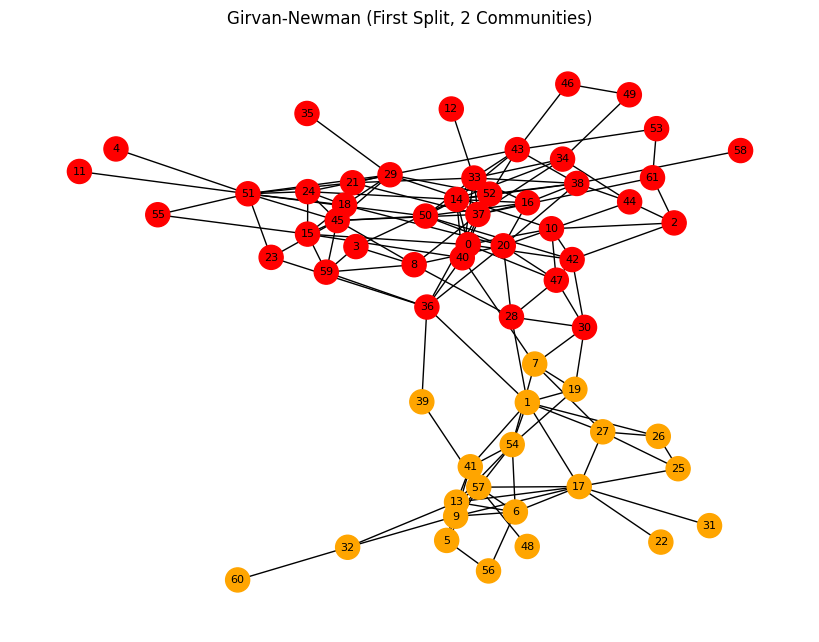

In [21]:
gn_generator = nx_comm.girvan_newman(G)
node_groups = [list(c) for c in next(gn_generator)]  # First split = 2 communities

# Assign red and orange colors manually
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append("red")
    else:
        color_map.append("orange")

# Plot with basic coloring
plt.figure(figsize=(8, 6))
nx.draw(G, node_color=color_map, with_labels=True, font_size=8, node_size=300)
plt.title("Girvan-Newman (First Split, 2 Communities)")
plt.show()


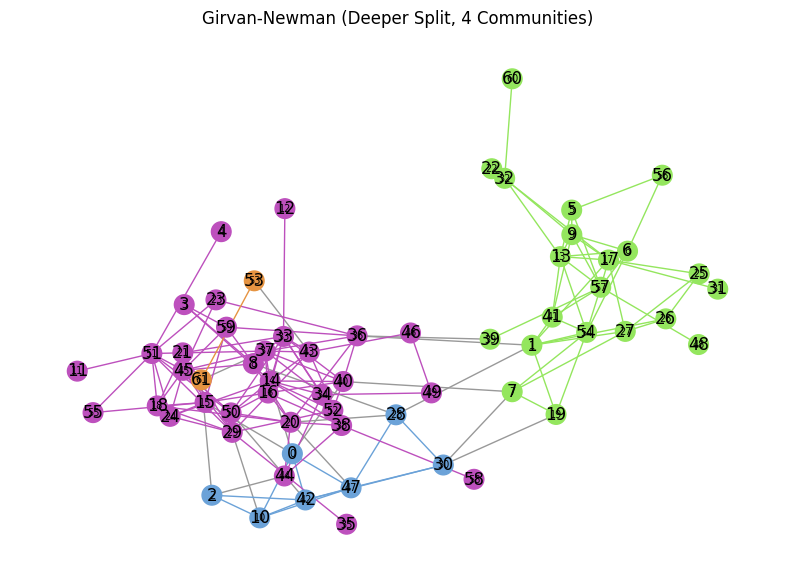

In [22]:
import itertools

# Get a deeper Girvan-Newman split (e.g., 3 communities)
result = nx_comm.girvan_newman(G)
communities_k = next(itertools.islice(result, 2, 3))  # Split into ~4 communities
communities_k = [list(c) for c in communities_k]

# Set node and edge community attributes
set_node_community(G, communities_k)
set_edge_community(G)

# Set community-based colors for nodes and internal edges
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

# Plot with more detailed community structure
pos = nx.spring_layout(G, k=0.4, seed=42)
plt.figure(figsize=(10, 7))
nx.draw_networkx(G, pos=pos, node_size=0, edgelist=external, edge_color="#999999")
nx.draw_networkx(G, pos=pos, node_color=node_color, edgelist=internal, edge_color=internal_color, node_size=200, font_size=7)
plt.title("Girvan-Newman (Deeper Split, 4 Communities)")
plt.axis("off")
plt.show()


##Detect Communities Using Louvain Algorithm


In [23]:
partition = nx_comm.louvain_communities(G, seed=42)
partition = [list(c) for c in partition]  # Ensure list of lists

# Print results
print("Number of communities found:", len(partition))
print("Modularity score:", nx_comm.modularity(G, partition))

Number of communities found: 5
Modularity score: 0.5188283691309679


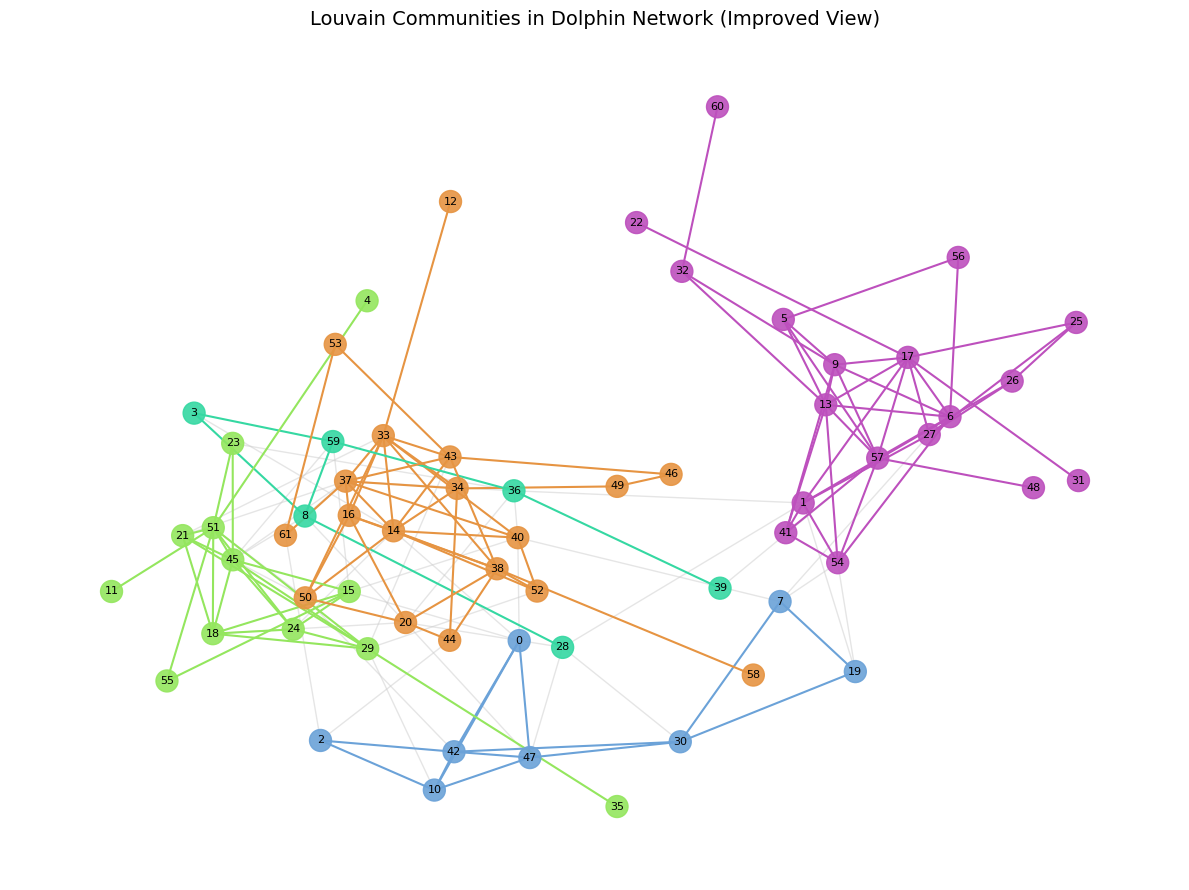

In [25]:

set_node_community(G, partition)
set_edge_community(G)

# Colors
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

# Plot
# Reuse layout with more spacing and refined styling
pos = nx.spring_layout(G, k=0.5, seed=42)  # Increase spacing

plt.figure(figsize=(12, 9))  # Bigger figure for more breathing room

# Draw external (cross-community) edges
nx.draw_networkx_edges(G, pos, edgelist=external, edge_color="#CCCCCC", alpha=0.5)

# Draw internal (intra-community) edges with color
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color, width=1.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=250, alpha=0.9)

# Draw labels (smaller font)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Louvain Communities in Dolphin Network (Improved View)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()



The Louvain algorithm identified 5 well-separated communities in the dolphin social network with a high modularity score of ~0.519. The improved visualization clearly shows distinct clusters and minimal label overlap, highlighting the networks underlying modular structure.

In [30]:
for i, c in enumerate(partition):
    print(f"Community {i+1}: {sorted(c)}")


Community 1: [0, 2, 7, 10, 19, 30, 42, 47]
Community 2: [4, 11, 15, 18, 21, 23, 24, 29, 35, 45, 51, 55]
Community 3: [1, 5, 6, 9, 13, 17, 22, 25, 26, 27, 31, 32, 41, 48, 54, 56, 57, 60]
Community 4: [12, 14, 16, 20, 33, 34, 37, 38, 40, 43, 44, 46, 49, 50, 52, 53, 58, 61]
Community 5: [3, 8, 28, 36, 39, 59]


##Bar Chart: Community Sizes

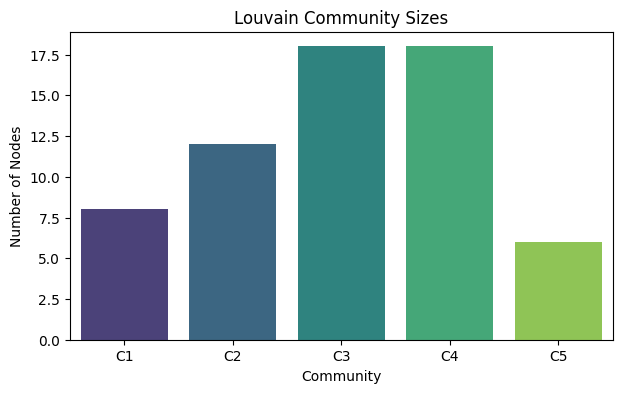

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sizes = [len(c) for c in partition]
df = pd.DataFrame({'Community': [f'C{i+1}' for i in range(len(sizes))], 'Size': sizes})

plt.figure(figsize=(7, 4))
sns.barplot(data=df, x='Community', y='Size', hue='Community', palette='viridis', legend=False)
plt.title('Louvain Community Sizes')
plt.ylabel("Number of Nodes")
plt.xlabel("Community")
plt.show()


In [31]:
cliques = list(nx.find_cliques(G))
cliques

[[1, 36],
 [1, 17, 27],
 [1, 54, 41],
 [1, 54, 19],
 [1, 26, 27],
 [1, 28],
 [2, 10, 42],
 [2, 44],
 [2, 61],
 [4, 51],
 [5, 56],
 [5, 9, 57, 13],
 [6, 56],
 [6, 13, 57, 9, 17],
 [6, 13, 57, 54],
 [7, 40],
 [7, 27],
 [7, 19, 54],
 [7, 19, 30],
 [8, 28, 20],
 [8, 3, 59],
 [8, 45, 59],
 [8, 45, 37],
 [9, 13, 32],
 [9, 13, 41, 57],
 [10, 0, 42, 47],
 [10, 29],
 [11, 51],
 [12, 33],
 [13, 54, 41, 57],
 [14, 0, 40],
 [14, 33, 50, 16],
 [14, 33, 37, 40],
 [14, 33, 37, 16],
 [14, 33, 37, 34],
 [14, 33, 37, 43],
 [14, 33, 38, 16],
 [14, 33, 38, 43],
 [14, 3],
 [14, 52, 40],
 [14, 52, 38],
 [14, 24],
 [15, 0, 40],
 [15, 45, 24, 18],
 [15, 45, 59],
 [15, 55],
 [17, 25, 27],
 [17, 31],
 [17, 22],
 [18, 20],
 [18, 45, 51, 29, 24],
 [18, 45, 51, 29, 21],
 [20, 36],
 [20, 38, 16],
 [20, 38, 44],
 [20, 47, 28],
 [20, 50, 16],
 [21, 33, 37],
 [21, 45, 37],
 [23, 51, 45],
 [23, 36],
 [25, 26, 27],
 [28, 47, 30],
 [29, 43],
 [29, 35],
 [29, 52],
 [30, 42, 47],
 [32, 60],
 [36, 59],
 [36, 37, 40],
 [36, 

In [38]:
# Find the largest clique (fully connected subgraph) in the dolphin network
max_clique = max(nx.find_cliques(G), key=len)
print("Maximum clique size:", len(max_clique))
print("Nodes in maximum clique:", max_clique)


Maximum clique size: 5
Nodes in maximum clique: [6, 13, 57, 9, 17]


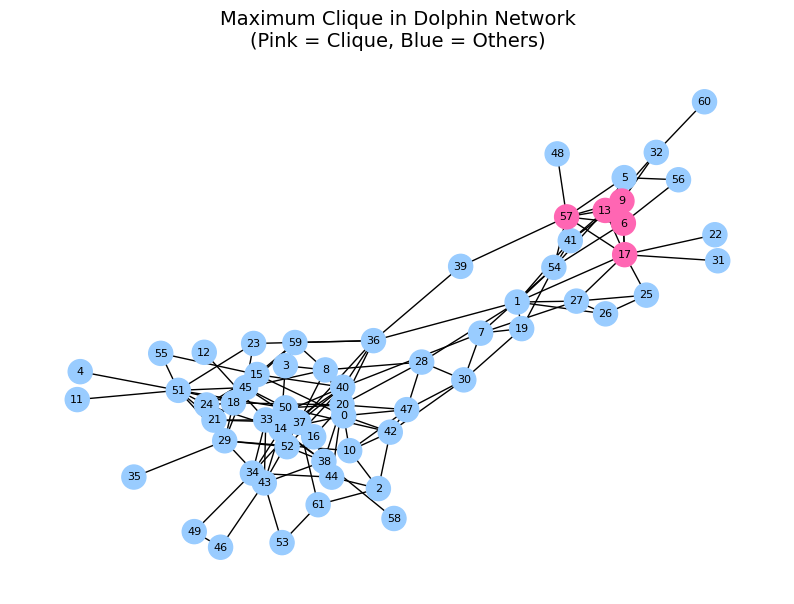

In [41]:
pos = nx.spring_layout(G, seed=42)


node_color = [(0.6, 0.8, 1.0) for _ in G.nodes()]


for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (1.0, 0.4, 0.7)

plt.figure(figsize=(10, 7))
nx.draw_networkx(G, pos=pos, node_color=node_color, with_labels=True, font_size=8)
plt.title("Maximum Clique in Dolphin Network\n(Pink = Clique, Blue = Others)", fontsize=14)
plt.axis("off")
plt.show()